In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

614

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | bonavista
Processing Record 4 of Set 1 | mahebourg
Processing Record 5 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 6 of Set 1 | yar-sale
Processing Record 7 of Set 1 | quatre cocos
Processing Record 8 of Set 1 | nishihara
Processing Record 9 of Set 1 | san patricio
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | atuona
Processing Record 12 of Set 1 | ust-nera
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | biu
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | havoysund
Processing Record 17 of Set 1 | ponta do sol
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 20 of Set 1 | husavik
Processing Record 21 of Set 1 | ka

Processing Record 36 of Set 4 | nanortalik
Processing Record 37 of Set 4 | saldanha
Processing Record 38 of Set 4 | saint-augustin
Processing Record 39 of Set 4 | strezhevoy
Processing Record 40 of Set 4 | meulaboh
Processing Record 41 of Set 4 | lebu
Processing Record 42 of Set 4 | dikson
Processing Record 43 of Set 4 | freudenberg
Processing Record 44 of Set 4 | petropavlovsk-kamchatskiy
Processing Record 45 of Set 4 | hasaki
Processing Record 46 of Set 4 | romny
Processing Record 47 of Set 4 | akureyri
Processing Record 48 of Set 4 | cabo san lucas
Processing Record 49 of Set 4 | bubaque
Processing Record 50 of Set 4 | dunedin
Processing Record 1 of Set 5 | torbay
Processing Record 2 of Set 5 | amudat
Processing Record 3 of Set 5 | gombong
Processing Record 4 of Set 5 | atikokan
Processing Record 5 of Set 5 | luderitz
Processing Record 6 of Set 5 | durango
Processing Record 7 of Set 5 | wolfenbuttel
Processing Record 8 of Set 5 | kon tum
Processing Record 9 of Set 5 | ilulissat
Proc

Processing Record 25 of Set 8 | hilton head island
Processing Record 26 of Set 8 | sabha
Processing Record 27 of Set 8 | trairi
Processing Record 28 of Set 8 | nicoya
Processing Record 29 of Set 8 | sabang
Processing Record 30 of Set 8 | rio gallegos
Processing Record 31 of Set 8 | touros
Processing Record 32 of Set 8 | pisco
Processing Record 33 of Set 8 | syamzha
Processing Record 34 of Set 8 | alofi
Processing Record 35 of Set 8 | mehamn
Processing Record 36 of Set 8 | ust-uda
Processing Record 37 of Set 8 | katsiveli
City not found. Skipping...
Processing Record 38 of Set 8 | neijiang
Processing Record 39 of Set 8 | turochak
Processing Record 40 of Set 8 | atar
Processing Record 41 of Set 8 | alice springs
Processing Record 42 of Set 8 | yaan
Processing Record 43 of Set 8 | alikalia
Processing Record 44 of Set 8 | tongling
Processing Record 45 of Set 8 | mahabaleshwar
Processing Record 46 of Set 8 | porto novo
Processing Record 47 of Set 8 | mujiayingzi
Processing Record 48 of Set 

Processing Record 16 of Set 12 | xuanzhou
Processing Record 17 of Set 12 | tecoanapa
Processing Record 18 of Set 12 | aswan
Processing Record 19 of Set 12 | namatanai
Processing Record 20 of Set 12 | bakchar
Processing Record 21 of Set 12 | assomada
Processing Record 22 of Set 12 | svetlaya
Processing Record 23 of Set 12 | kloulklubed
Processing Record 24 of Set 12 | topola
Processing Record 25 of Set 12 | ankang
Processing Record 26 of Set 12 | yuncheng
Processing Record 27 of Set 12 | belgrade
Processing Record 28 of Set 12 | armacao dos buzios
City not found. Skipping...
Processing Record 29 of Set 12 | villamontes
Processing Record 30 of Set 12 | sicamous
Processing Record 31 of Set 12 | port-cartier
Processing Record 32 of Set 12 | gornyak
Processing Record 33 of Set 12 | henties bay
Processing Record 34 of Set 12 | kontagora
Processing Record 35 of Set 12 | san jeronimo de tunan
City not found. Skipping...
Processing Record 36 of Set 12 | tashtagol
Processing Record 37 of Set 12 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mataura,-46.1927,168.8643,39.47,97,91,5.50,NZ,2021-08-08 23:37:10
1,Bonavista,48.6499,-53.1147,56.12,76,76,16.40,CA,2021-08-08 23:37:11
2,Mahebourg,-20.4081,57.7000,68.29,94,75,3.44,MU,2021-08-08 23:37:11
3,Yar-Sale,66.8333,70.8333,52.18,64,100,15.39,RU,2021-08-08 23:37:11
4,Quatre Cocos,-20.2078,57.7625,68.11,92,93,18.66,MU,2021-08-08 23:37:12
5,Nishihara,26.1842,127.7558,80.26,94,75,10.36,JP,2021-08-08 23:37:12
6,San Patricio,28.0170,-97.5169,92.12,61,31,18.16,US,2021-08-08 23:37:12
7,Georgetown,5.4112,100.3354,80.89,88,20,4.61,MY,2021-08-08 23:37:13
8,Atuona,-9.8000,-139.0333,77.68,79,23,21.27,PF,2021-08-08 23:37:13
9,Ust-Nera,64.5667,143.2000,72.34,40,7,4.07,RU,2021-08-08 23:37:13


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2021-08-08 23:37:10,-46.1927,168.8643,39.47,97,91,5.50
1,Bonavista,CA,2021-08-08 23:37:11,48.6499,-53.1147,56.12,76,76,16.40
2,Mahebourg,MU,2021-08-08 23:37:11,-20.4081,57.7000,68.29,94,75,3.44
3,Yar-Sale,RU,2021-08-08 23:37:11,66.8333,70.8333,52.18,64,100,15.39
4,Quatre Cocos,MU,2021-08-08 23:37:12,-20.2078,57.7625,68.11,92,93,18.66


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

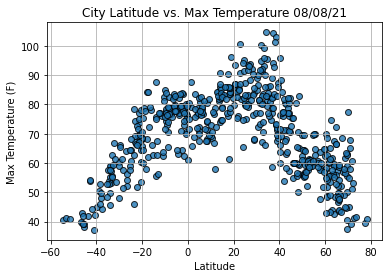

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

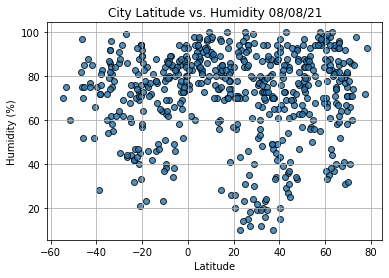

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

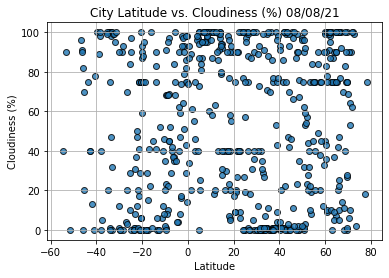

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

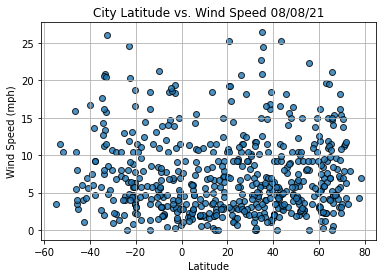

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()